In [1]:
# Load the data
!wget https://raw.githubusercontent.com/elinar2014/ML-Assignment/main/train_data.csv

--2024-05-24 17:55:33--  https://raw.githubusercontent.com/elinar2014/ML-Assignment/main/train_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14340436 (14M) [text/plain]
Saving to: ‘train_data.csv’

train_data.csv      100%[===================>]  13.68M  --.-KB/s    in 0.08s   

2024-05-24 17:55:34 (162 MB/s) - ‘train_data.csv’ saved [14340436/14340436]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
data = pd.read_csv('/content/train_data.csv')

In [3]:
data


,UserID,QuestionTiming,TimeUtc,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue
0,p1,User Initiated,2022-08-18 22:55:27,NaN,NaN,2,NaN,NaN,Wellbeing,509.0
1,p1,System Initiated,2022-08-18 23:38:31,NaN,NaN,0,NaN,NaN,Wellbeing,653.0
2,p1,User Initiated,2022-08-18 23:39:24,Career,HOME_VAN,1,WASH_PWVan,1.000000,Wellbeing,705.0
3,p1,System Initiated,2022-08-18 23:45:01,Career,RESIDENTIALSMALL_BACKYARD,6,WASH_PWVan,0.168267,Wellbeing,817.0
4,p1,System Initiated,2022-08-18 23:51:22,Career,RESIDENTIALSMALL_BACKYARD,13,WASH_PWVan,0.429364,Wellbeing,810.0
...,...,...,...,...,...,...,...,...,...,...
134415,p9991,System Initiated,2023-03-16 03:58:11,Career,RECREATIONGROUND_SKATEPARK,64,NaN,0.837365,Wellbeing,634.0
134416,p9991,System Initiated,2023-03-16 04:43:14,Career,RECREATIONGROUND_SKATEPARK,109,NaN,0.983866,Wellbeing,806.0
134417,p9992,System Initiated,2023-02-12 21:15:06,Career,RESIDENTIALSMALL_BUNGALOW,37,WASH_DirtBike,0.999620,Wellbeing,902.0
134418,p9992,System Initiated,2023-02-12 21:33:31,Career,RECREATIONGROUND_PLAYGROUND,55,WASH_Roundabout,0.763144,Wellbeing,1000.0


In [4]:
data.isnull().sum()

UserID                        0
QuestionTiming                0
TimeUtc                       0
CurrentGameMode           17013
CurrentTask               17013
CurrentSessionLength          0
LastTaskCompleted         62605
LevelProgressionAmount    17018
QuestionType                  0
ResponseValue                 0
dtype: int64

In [5]:
data = data.drop(columns=['LastTaskCompleted'])
data.shape

(134420, 9)

In [6]:
data = data.dropna()

In [7]:
data.shape

(117402, 9)

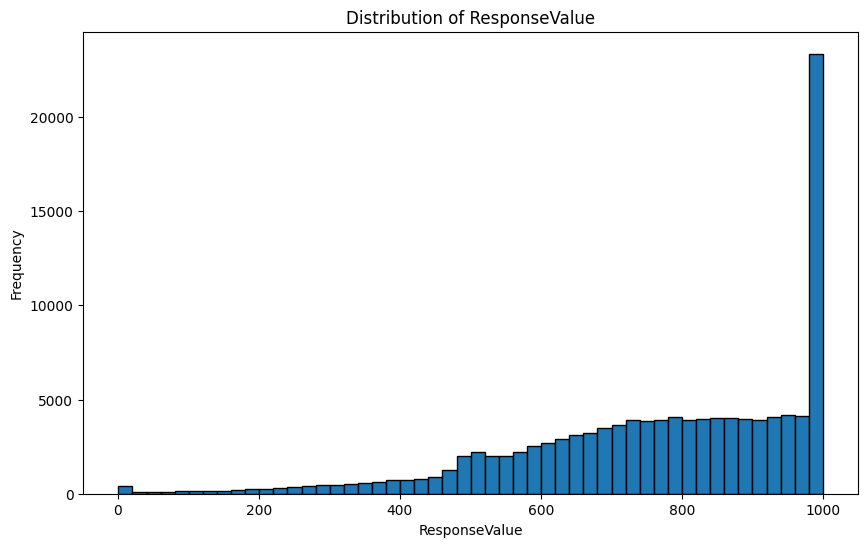

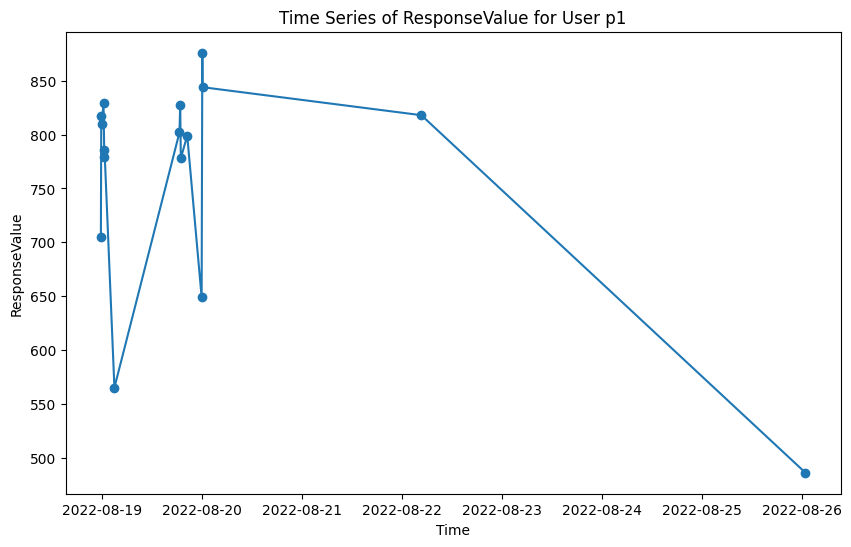

,UserID,QuestionTiming,TimeUtc,CurrentGameMode,CurrentTask,CurrentSessionLength,LevelProgressionAmount,QuestionType,ResponseValue
count,117402,117402,117402,117402,117402,117402.000000,117402.000000,117402,117402.000000
unique,7955,2,NaN,4,49,NaN,NaN,1,NaN
top,p2852,System Initiated,NaN,Career,RECREATIONGROUND_PLAYGROUND,NaN,NaN,Wellbeing,NaN
freq,425,102002,NaN,110722,18037,NaN,NaN,117402,NaN
mean,NaN,NaN,2022-10-07 11:00:07.208446208,NaN,NaN,92.610986,0.542331,NaN,770.596557
min,NaN,NaN,2022-08-18 13:09:53,NaN,NaN,0.000000,0.000000,NaN,1.000000
25%,NaN,NaN,2022-08-23 14:47:17,NaN,NaN,22.000000,0.266356,NaN,645.000000
50%,NaN,NaN,2022-09-01 06:56:14.500000,NaN,NaN,47.000000,0.550076,NaN,805.000000
75%,NaN,NaN,2022-10-22 01:35:34.249999872,NaN,NaN,113.000000,0.825798,NaN,952.000000
max,NaN,NaN,2023-03-28 20:26:03,NaN,NaN,7301.000000,1.000000,NaN,1000.000000


In [8]:
# Convert the TimeUtc column to datetime
data['TimeUtc'] = pd.to_datetime(data['TimeUtc'])

# Basic EDA
eda_summary = data.describe(include='all')

import matplotlib.pyplot as plt

# Plotting the distribution of ResponseValue
plt.figure(figsize=(10, 6))
plt.hist(data['ResponseValue'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of ResponseValue')
plt.xlabel('ResponseValue')
plt.ylabel('Frequency')
plt.show()

# Plotting the time series of ResponseValue for a sample UserID
sample_user = data[data['UserID'] == 'p1']

plt.figure(figsize=(10, 6))
plt.plot(sample_user['TimeUtc'], sample_user['ResponseValue'], marker='o')
plt.title('Time Series of ResponseValue for User p1')
plt.xlabel('Time')
plt.ylabel('ResponseValue')
plt.show()

eda_summary


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 117402 entries, 2 to 134419
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UserID                  117402 non-null  object        
 1   QuestionTiming          117402 non-null  object        
 2   TimeUtc                 117402 non-null  datetime64[ns]
 3   CurrentGameMode         117402 non-null  object        
 4   CurrentTask             117402 non-null  object        
 5   CurrentSessionLength    117402 non-null  int64         
 6   LevelProgressionAmount  117402 non-null  float64       
 7   QuestionType            117402 non-null  object        
 8   ResponseValue           117402 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 9.0+ MB
None

Data Description:
                             TimeUtc  CurrentSessionLength  \
count                         117402         

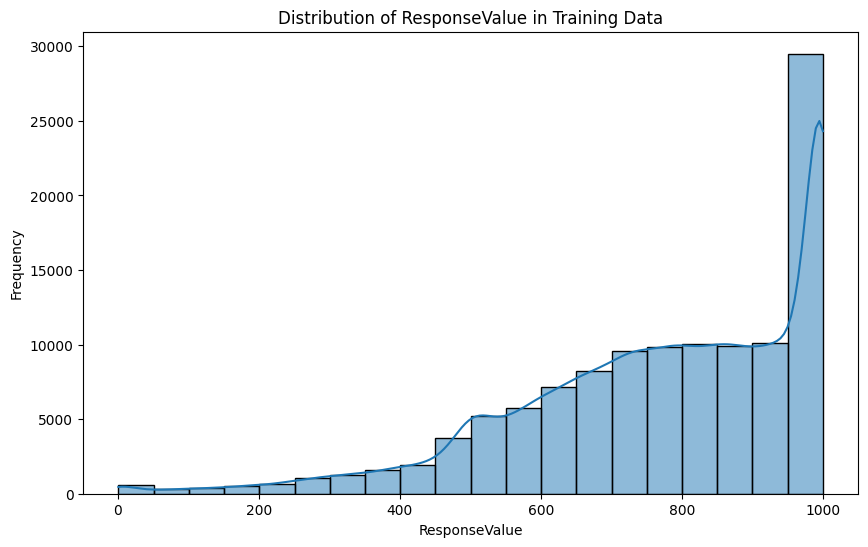

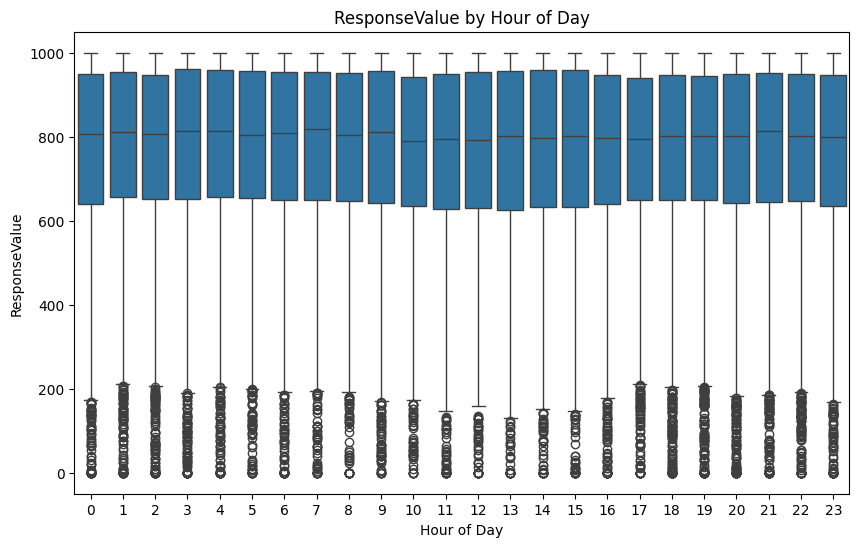

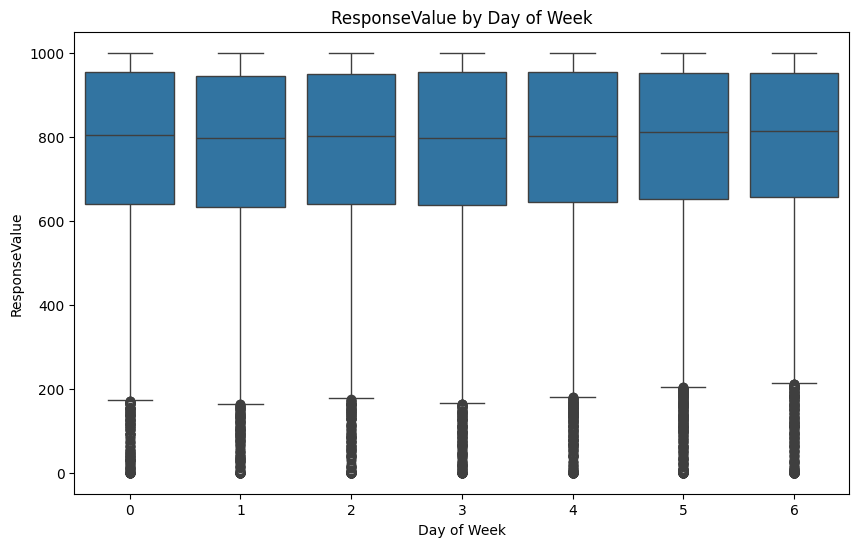

In [9]:
# General data review
print("\nData Info:")
print(data.info())

# Review Statistical summary of data
print("\nData Description:")
print(data.describe())

# Distributaion of ResponseValue
plt.figure(figsize=(10, 6))
sns.histplot(data['ResponseValue'], bins=20, kde=True)
plt.title('Distribution of ResponseValue in Training Data')
plt.xlabel('ResponseValue')
plt.ylabel('Frequency')
plt.show()

# Change TimeUtc to datetime
data['TimeUtc'] = pd.to_datetime(data['TimeUtc'])

# Time information extraction
data['hour'] = data['TimeUtc'].dt.hour
data['dayofweek'] = data['TimeUtc'].dt.dayofweek

# ResponseValue distribution Based on the Hour of Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='ResponseValue', data=data)
plt.title('ResponseValue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('ResponseValue')
plt.show()

# ResponseValue distribution Based on Day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='ResponseValue', data=data)
plt.title('ResponseValue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('ResponseValue')
plt.show()

In [10]:
data.head()

,UserID,QuestionTiming,TimeUtc,CurrentGameMode,CurrentTask,CurrentSessionLength,LevelProgressionAmount,QuestionType,ResponseValue,hour,dayofweek
2,p1,User Initiated,2022-08-18 23:39:24,Career,HOME_VAN,1,1.000000,Wellbeing,705.0,23,3
3,p1,System Initiated,2022-08-18 23:45:01,Career,RESIDENTIALSMALL_BACKYARD,6,0.168267,Wellbeing,817.0,23,3
4,p1,System Initiated,2022-08-18 23:51:22,Career,RESIDENTIALSMALL_BACKYARD,13,0.429364,Wellbeing,810.0,23,3
5,p1,System Initiated,2022-08-19 00:17:24,Career,RESIDENTIALSMALL_BACKYARD,22,0.999766,Wellbeing,829.0,0,4
6,p1,System Initiated,2022-08-19 00:28:44,Career,RESIDENTIALSMALL_BUNGALOW,33,0.315248,Wellbeing,779.0,0,4


In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import pandas as pd

# The data frame called data
#Add time features
data['Hour'] = data['TimeUtc'].dt.hour
data['DayOfWeek'] = data['TimeUtc'].dt.dayofweek
data['DayOfMonth'] = data['TimeUtc'].dt.day
data['Month'] = data['TimeUtc'].dt.month
data['Year'] = data['TimeUtc'].dt.year
data['Day'] = data['TimeUtc'].dt.day_of_year

# Data sorting
data = data.sort_values(by=['UserID', 'TimeUtc'])

data['Lag1'] = data.groupby('UserID')['ResponseValue'].shift(1)
data['Lag2'] = data.groupby('UserID')['ResponseValue'].shift(2)

print(data[['UserID', 'ResponseValue', 'Lag1', 'Lag2']].head(10))


# Drop rows with NaN values
data = data.dropna()

# Apply Label Encoding for Hour and Day
label_encoder_hour = LabelEncoder()
label_encoder_day = LabelEncoder()

data['Hour_Encoded'] = label_encoder_hour.fit_transform(data['Hour'])
data['Day_Encoded'] = label_encoder_day.fit_transform(data['Day'])

# Data Preparation for Modeling
features = ['Year','Hour', 'Day', 'CurrentSessionLength', 'LevelProgressionAmount', 'QuestionTiming', 'CurrentGameMode','Lag1','Lag2']
X = data[features]

# Convert Batch variables to numbers using pd.get_dummies
X = pd.get_dummies(X, columns=['QuestionTiming', 'CurrentGameMode'], dtype=int)

# Target Value
y = data['ResponseValue']

# Apply MinMaxScalar for desired features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_matrix = X.values

#Convert to matrix
y_matrix = y.values.reshape(-1, 1)

X_scaled = scaler_X.fit_transform(X_matrix)

# scaling for target value
y_scaled = scaler_y.fit_transform(y_matrix)

   UserID  ResponseValue   Lag1   Lag2
2      p1          705.0    NaN    NaN
3      p1          817.0  705.0    NaN
4      p1          810.0  817.0  705.0
5      p1          829.0  810.0  817.0
6      p1          779.0  829.0  810.0
7      p1          786.0  779.0  829.0
8      p1          565.0  786.0  779.0
10     p1          802.0  565.0  786.0
11     p1          827.0  802.0  565.0
12     p1          778.0  827.0  802.0


<ipython-input-11-7a5aa07515e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour_Encoded'] = label_encoder_hour.fit_transform(data['Hour'])
<ipython-input-11-7a5aa07515e8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day_Encoded'] = label_encoder_day.fit_transform(data['Day'])


In [12]:
X

,Year,Hour,Day,CurrentSessionLength,LevelProgressionAmount,Lag1,Lag2,QuestionTiming_System Initiated,QuestionTiming_User Initiated,CurrentGameMode_Career,CurrentGameMode_Challenge,CurrentGameMode_FreePlay,CurrentGameMode_Special
4,2022,23,230,13,0.429364,817.0,705.0,1,0,1,0,0,0
5,2022,0,231,22,0.999766,810.0,817.0,1,0,1,0,0,0
6,2022,0,231,33,0.315248,829.0,810.0,1,0,1,0,0,0
7,2022,0,231,36,0.389675,779.0,829.0,0,1,1,0,0,0
8,2022,2,231,0,0.390541,786.0,779.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70401,2022,3,285,20,0.445170,763.0,809.0,1,0,1,0,0,0
70402,2022,4,285,80,0.887364,806.0,763.0,1,0,1,0,0,0
70403,2022,5,285,97,0.971528,877.0,806.0,1,0,1,0,0,0
70404,2022,5,285,105,0.999969,948.0,877.0,1,0,1,0,0,0


In [13]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Model definition
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Artificial Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42)
}

results = []

# Train and Evaluation of models
for name, model in models.items():
    model.fit(X_train, y_train.ravel())  # Using ravel() to convert y_train to the correct shape
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    results.append({
        "Model": name,
        "Mean Absolute Error": 100 - (100 * mae),
        "Root Mean Squared Error": rmse,
        "Mean Squared Error": mse,
    })

# Converting the results to DataFrame
results_df = pd.DataFrame(results)

results_df
print(results_df)
# Save the results_df DataFrame as a CSV file
results_df.to_csv('results.csv', index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 71575, number of used features: 12
[LightGBM] [Info] Start training from score 0.772165
                        Model  Mean Absolute Error  Root Mean Squared Error  \
0           Linear Regression            91.638132                 0.126320   
1               Random Forest            91.474504                 0.128790   
2      Support Vector Machine            90.734966                 0.129104   
3                     XGBoost            91.721332                 0.127559   
4   Artificial Neural Network            91.624655                 0.125775   
5                    LightGBM            91.873776                 0.125049   
6           Gradient Boosting            91.857590                 0.125060   
7                    AdaBo